In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

In [2]:
data = pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.shape

(18110, 9)

In [5]:
# keeping only requred columns
data = data[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [6]:
# renaming all columns name
data.columns = ['date','state','cured','deaths','confirmed']

In [7]:
data.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [8]:
data.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [9]:
# current date
today = data[data['date']=='2021-08-11']

In [10]:
 today

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [11]:
today.head()

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [12]:
# sorting data w.r.t. numbers of confirmed cases
max_confirmed_cases = today.sort_values(by=['confirmed'],ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [13]:
# getting top confirmed cases
top_confirmed_cases = max_confirmed_cases[0:5]

In [14]:
top_confirmed_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


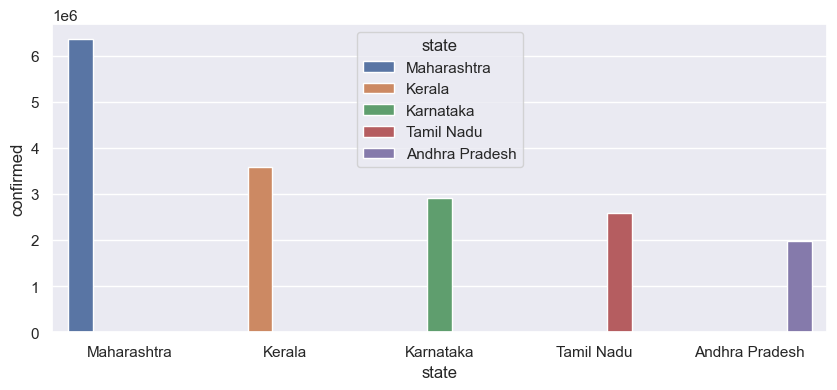

In [15]:
# creating bar plot for states with most confirmed cases
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x='state',y='confirmed',data=top_confirmed_cases,hue='state')
plt.show()

In [16]:
# getting max death cases
max_death_cases = today.sort_values(by=['deaths'],ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18090,2021-08-11,Kerala,3396184,18004,3586693
18101,2021-08-11,Punjab,582791,16322,599573
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18080,2021-08-11,Chhattisgarh,988189,13544,1003356


In [17]:
# getting top death cases state
top_death_cases = max_death_cases[0:5]

In [18]:
top_death_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


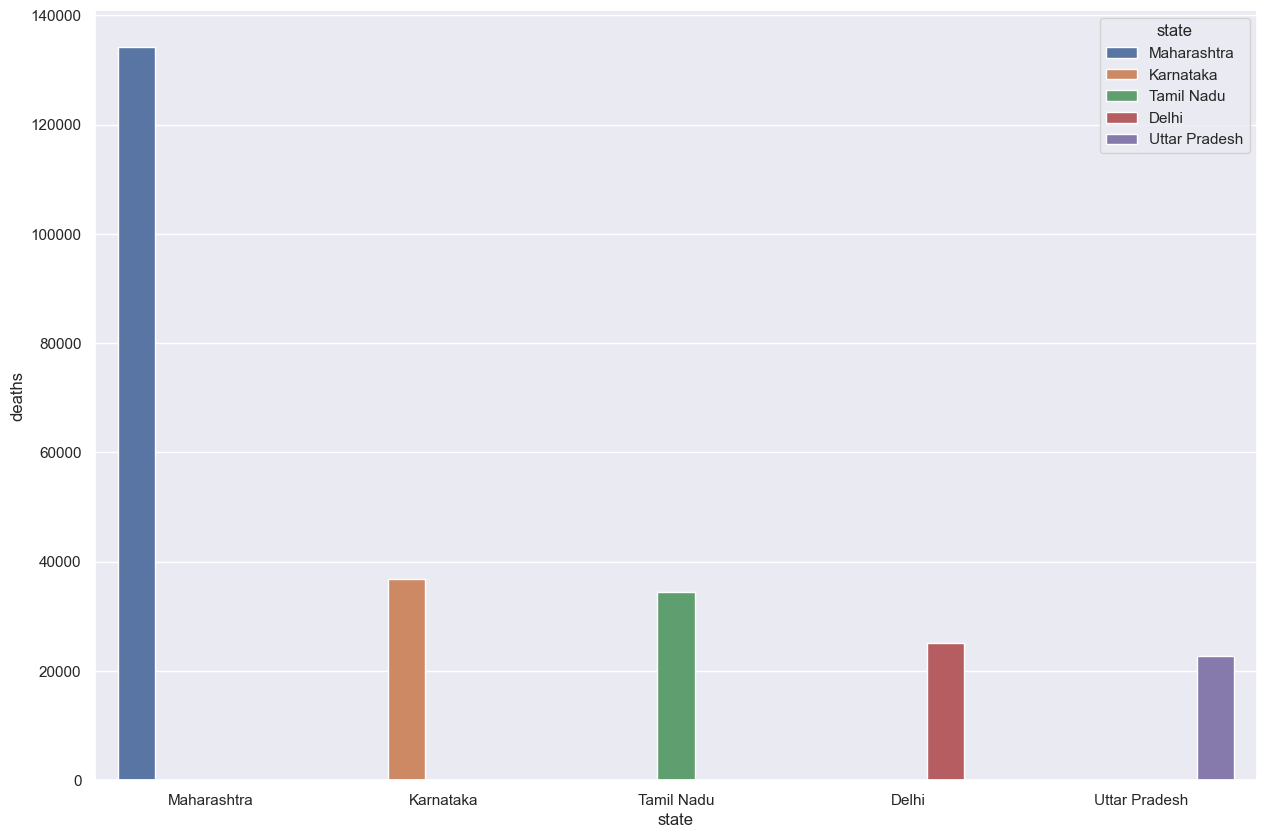

In [19]:
# creating bar plot for states with most death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='state',y='deaths',data=top_death_cases,hue='state')
plt.show()

In [20]:
# sorting data number of max cured cases
max_cured_cases = today.sort_values(by=['cured'],ascending=False)

In [21]:
max_cured_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [22]:
# getting top cured cases
top_cured_cases = max_cured_cases[0:5]

In [23]:
top_cured_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


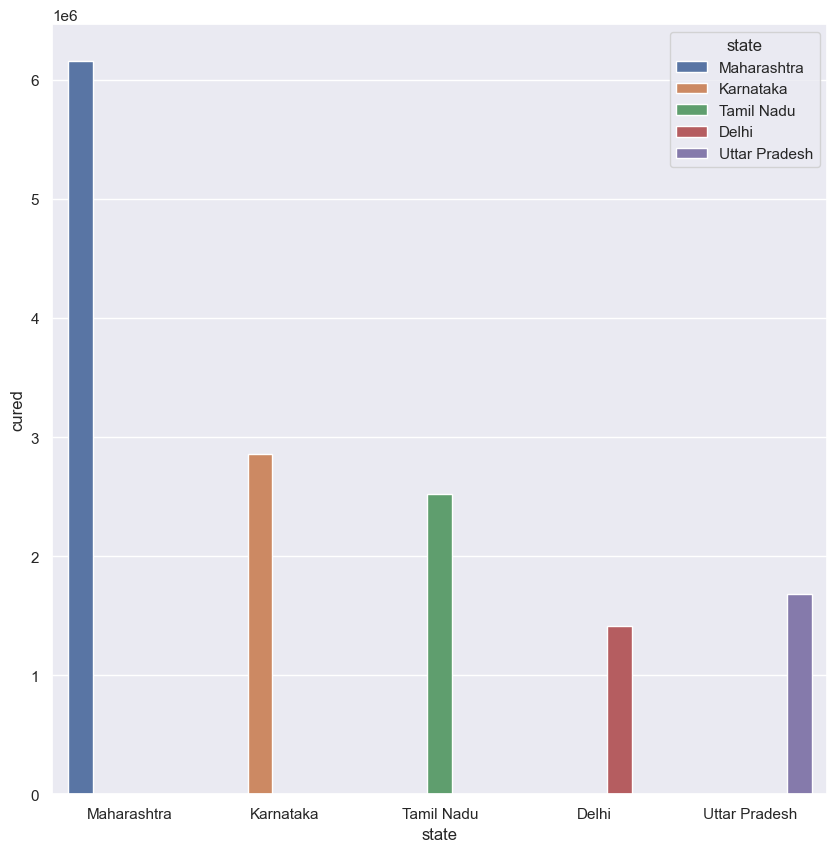

In [24]:
# creating bar plot for states with most cured cases
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x='state',y='cured',data=top_death_cases,hue='state')
plt.show()

In [25]:
# Maharashtra
Maha = data[data['state']=='Maharashtra']

In [26]:
Maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


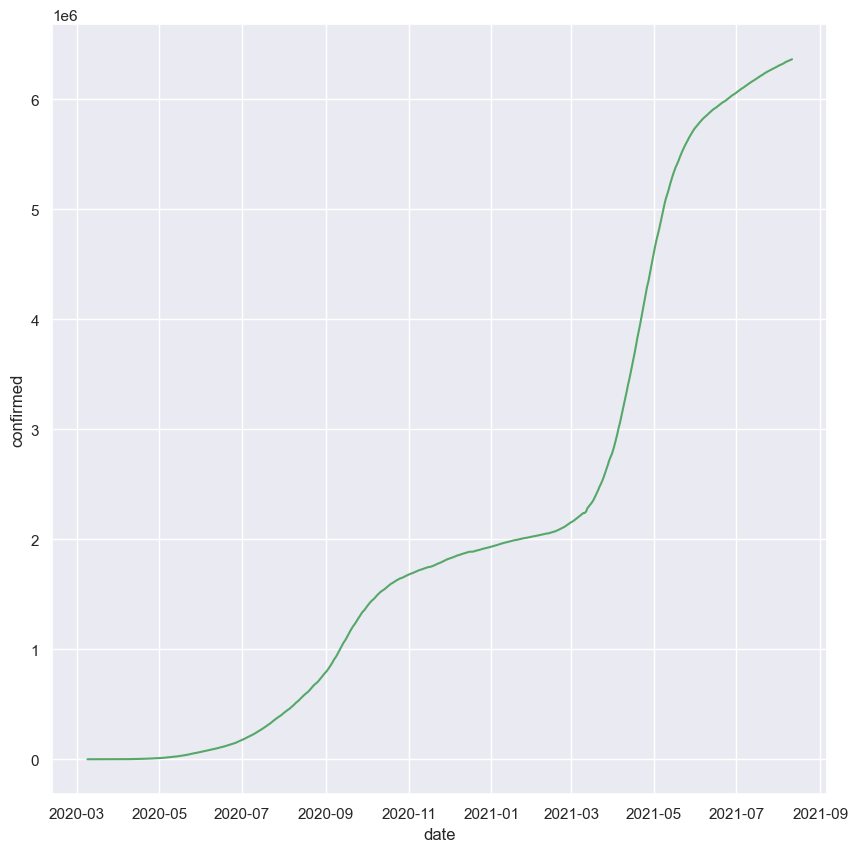

In [27]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=Maha,color='g')
plt.show()

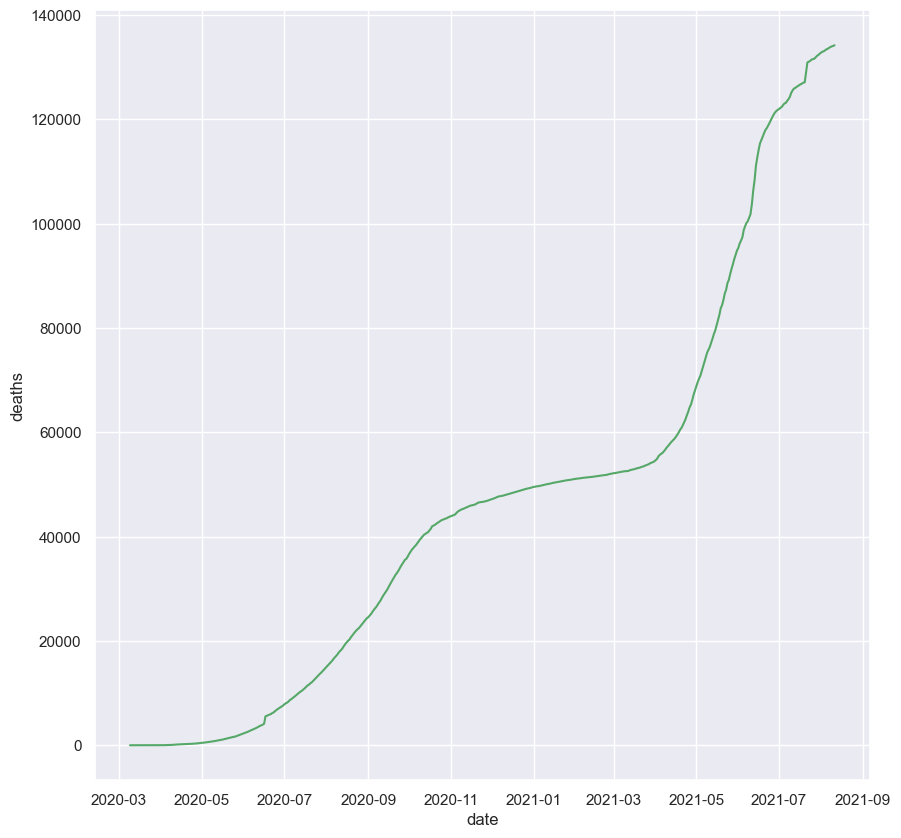

In [28]:
# visualizing death cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='deaths',data=Maha,color='g')
plt.show()

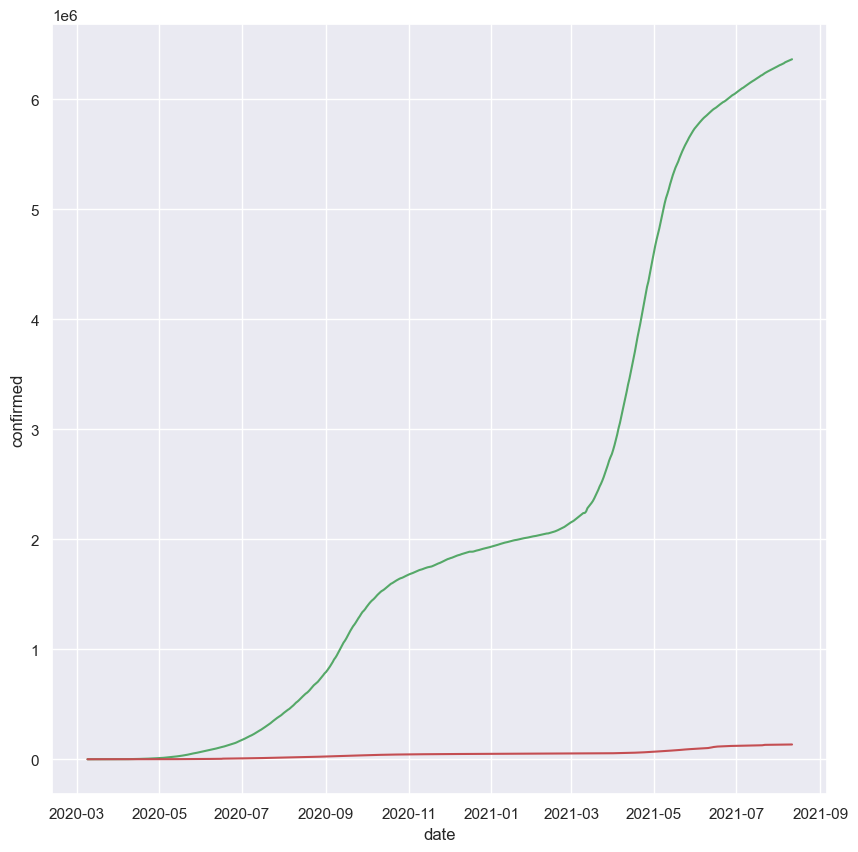

In [29]:
# visualizing confirmed cases and death cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=Maha,color='g')
sns.lineplot(x='date',y='deaths',data=Maha,color='r')
plt.show()

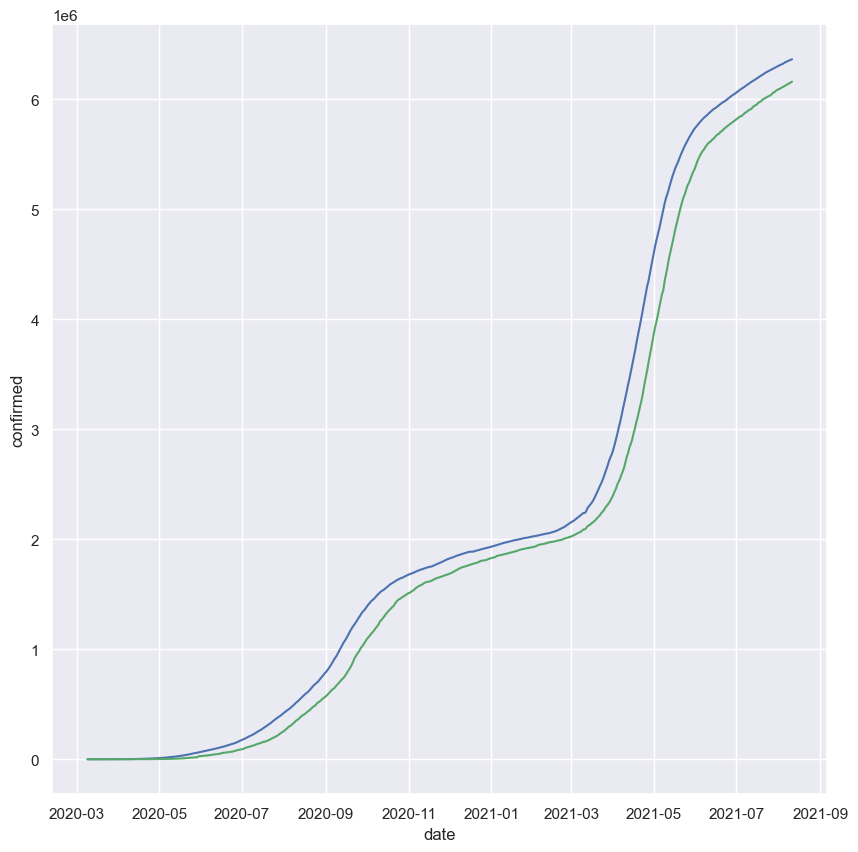

In [30]:
# visualizing confirmed cases and cured cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=Maha,color='b')
sns.lineplot(x='date',y='cured',data=Maha,color='g')
plt.show()

In [31]:
up = data[data['state']=='Uttar Pradesh']

In [32]:
up

,date,state,cured,deaths,confirmed
39,2020-03-04,Uttar Pradesh,0,0,6
50,2020-03-05,Uttar Pradesh,0,0,7
55,2020-03-06,Uttar Pradesh,0,0,7
58,2020-03-07,Uttar Pradesh,0,0,7
72,2020-03-08,Uttar Pradesh,0,0,7
...,...,...,...,...,...
17964,2021-08-07,Uttar Pradesh,1685299,22771,1708689
18000,2021-08-08,Uttar Pradesh,1685357,22773,1708716
18036,2021-08-09,Uttar Pradesh,1685406,22773,1708772
18072,2021-08-10,Uttar Pradesh,1685449,22774,1708793


In [33]:
up.head()

,date,state,cured,deaths,confirmed
39,2020-03-04,Uttar Pradesh,0,0,6
50,2020-03-05,Uttar Pradesh,0,0,7
55,2020-03-06,Uttar Pradesh,0,0,7
58,2020-03-07,Uttar Pradesh,0,0,7
72,2020-03-08,Uttar Pradesh,0,0,7


In [34]:
up.sort_values(by=['deaths'],ascending=False)

,date,state,cured,deaths,confirmed
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18072,2021-08-10,Uttar Pradesh,1685449,22774,1708793
18036,2021-08-09,Uttar Pradesh,1685406,22773,1708772
18000,2021-08-08,Uttar Pradesh,1685357,22773,1708716
17964,2021-08-07,Uttar Pradesh,1685299,22771,1708689
...,...,...,...,...,...
444,2020-03-28,Uttar Pradesh,11,0,55
471,2020-03-29,Uttar Pradesh,11,0,65
498,2020-03-30,Uttar Pradesh,11,0,82
526,2020-03-31,Uttar Pradesh,14,0,101


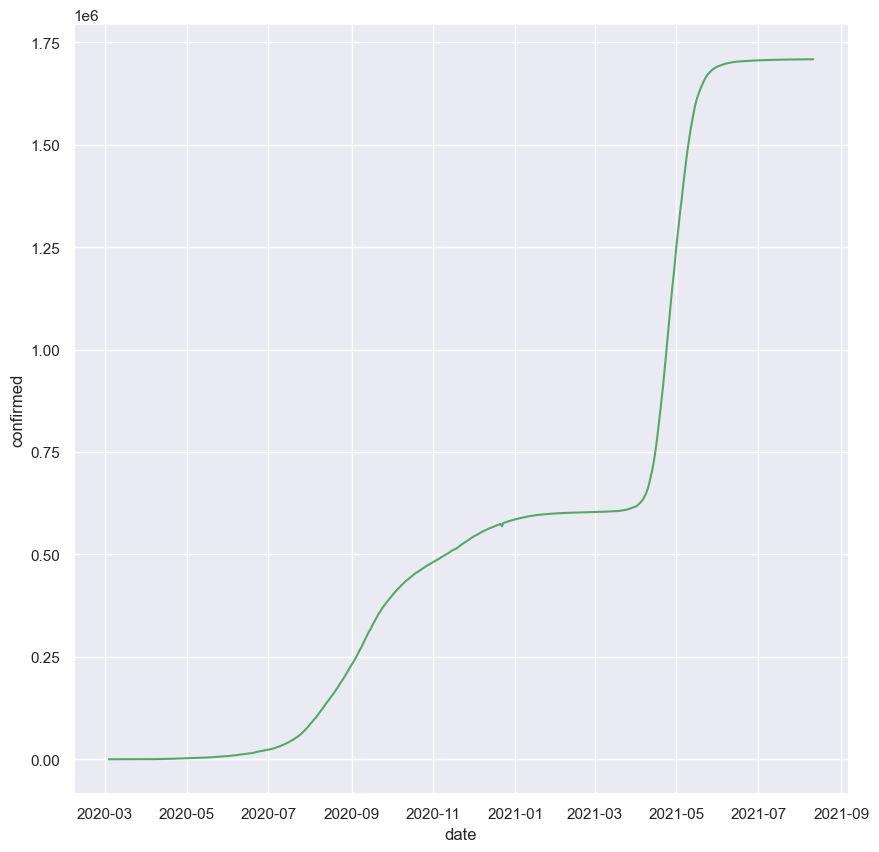

In [35]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=up,color='g')
plt.show()

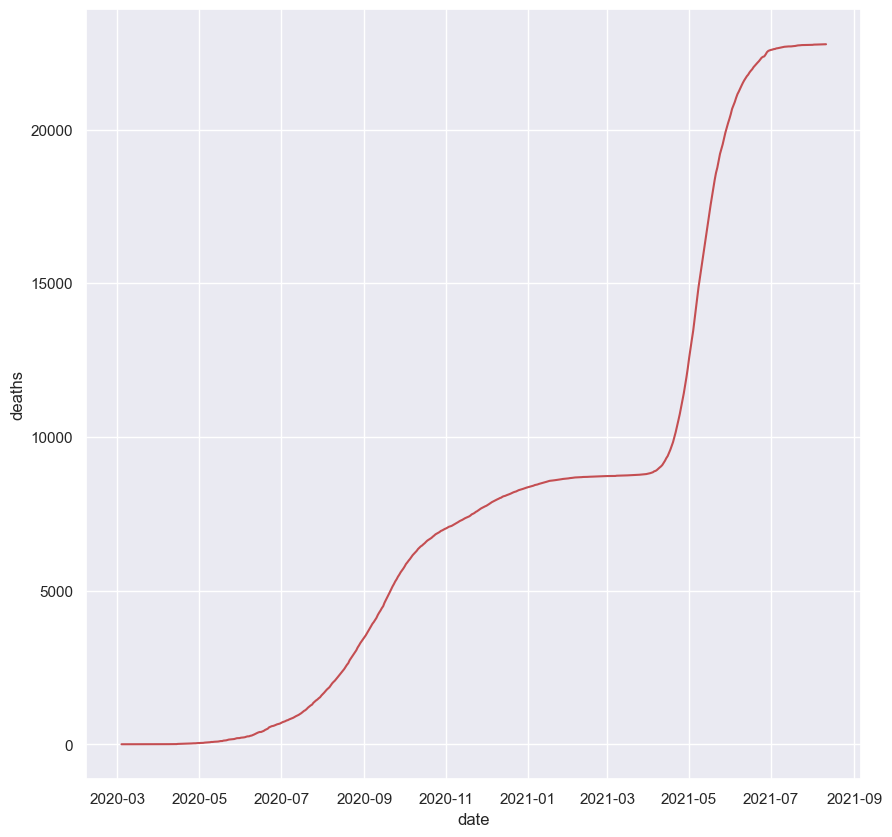

In [36]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='deaths',data=up,color='r')
plt.show()

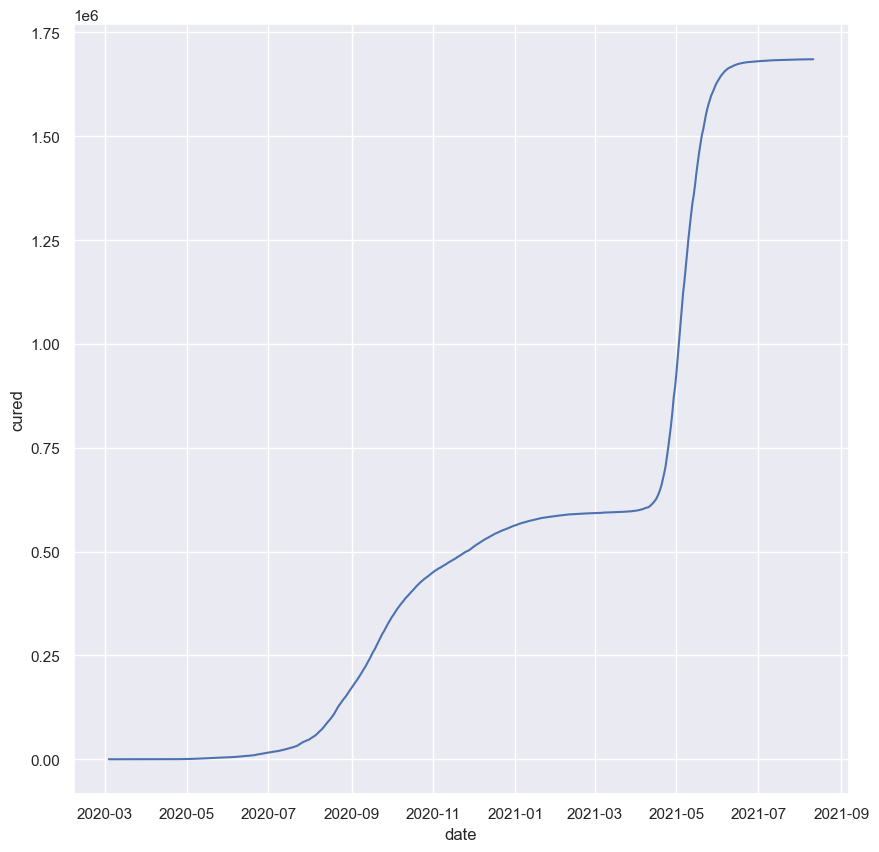

In [37]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='cured',data=up,color='b')
plt.show()

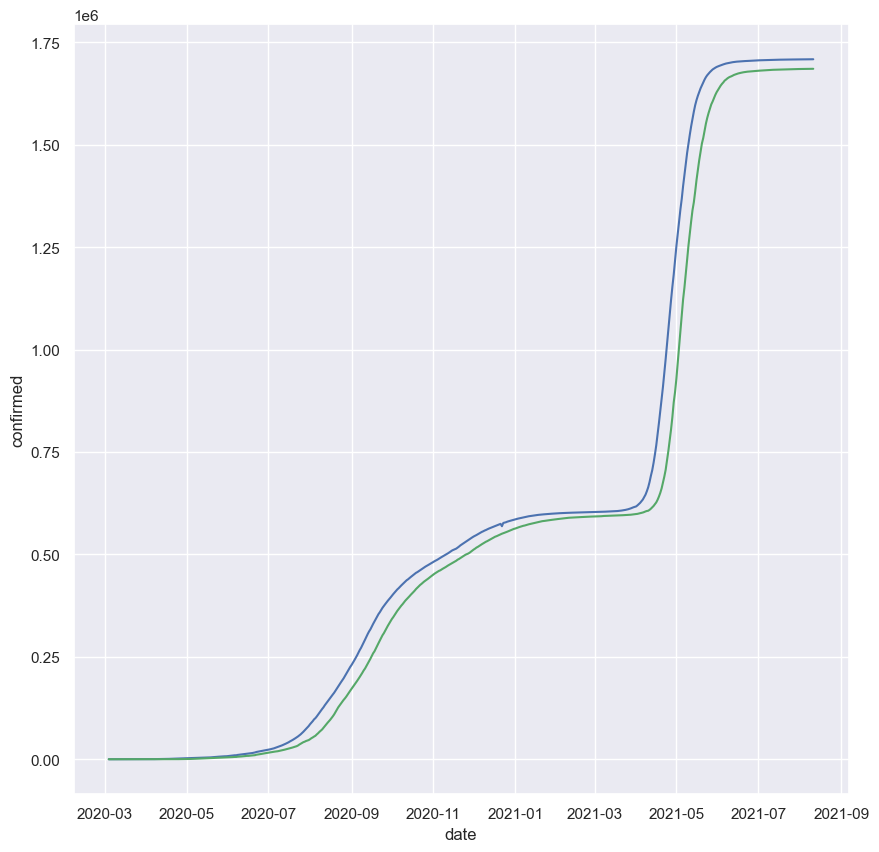

In [38]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=up,color='b')
sns.lineplot(x='date',y='cured',data=up,color='g')
plt.show()

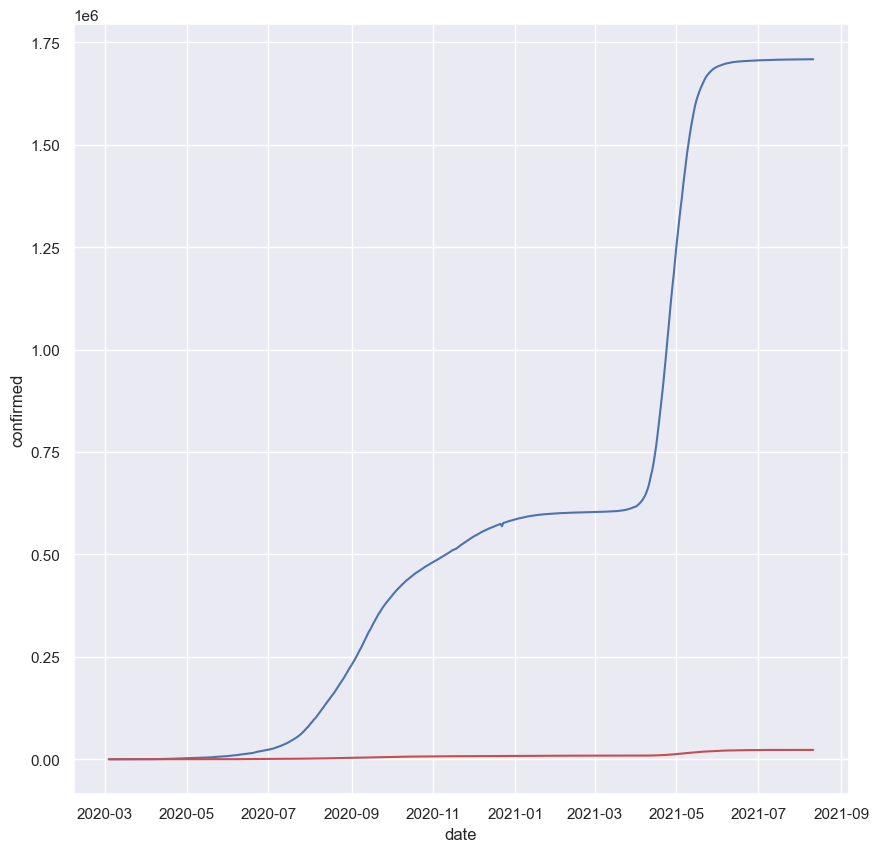

In [39]:
# visualizing confirmed cases in maharastra
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=up,color='b')
sns.lineplot(x='date',y='deaths',data=up,color='r')
plt.show()

In [40]:
# Kerala
kerala=data[data['state']=='Kerala']

In [41]:
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


In [42]:
kerala.shape

(560, 5)

In [43]:
kerala.sort_values(by=['deaths'],ascending=False)

,date,state,cured,deaths,confirmed
18090,2021-08-11,Kerala,3396184,18004,3586693
18054,2021-08-10,Kerala,3377691,17852,3565574
18018,2021-08-09,Kerala,3357687,17747,3552525
17982,2021-08-08,Kerala,3337579,17654,3533918
17946,2021-08-07,Kerala,3317314,17515,3513551
...,...,...,...,...,...
53,2020-03-06,Kerala,3,0,3
47,2020-03-05,Kerala,3,0,3
40,2020-03-04,Kerala,3,0,3
37,2020-03-03,Kerala,3,0,3


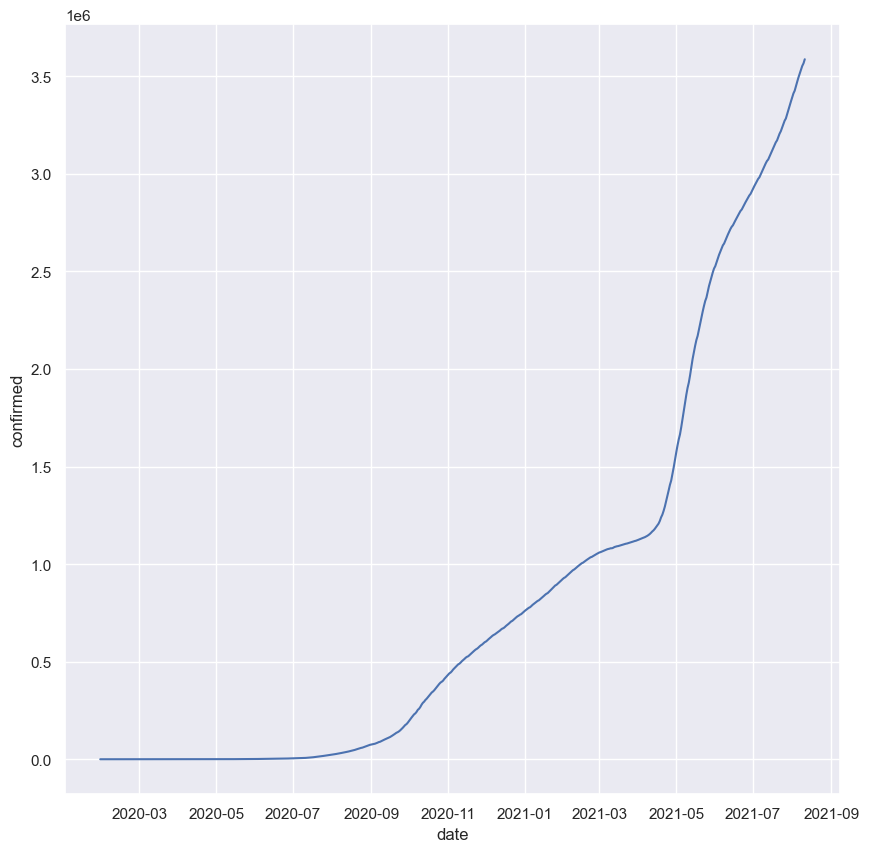

In [44]:
sns.set({'figure.figsize':(10,10)})
sns.lineplot(x='date',y='confirmed',data=kerala)
plt.show()

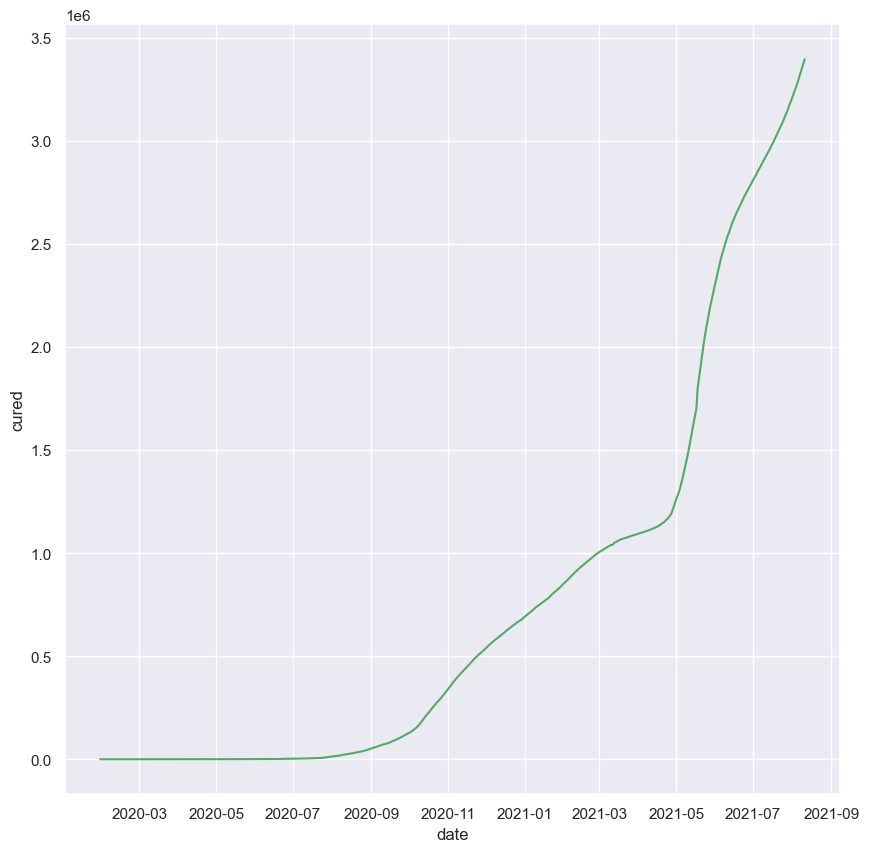

In [45]:
sns.set({'figure.figsize':(10,10)})
sns.lineplot(x='date',y='cured',data=kerala,color='g')
plt.show()

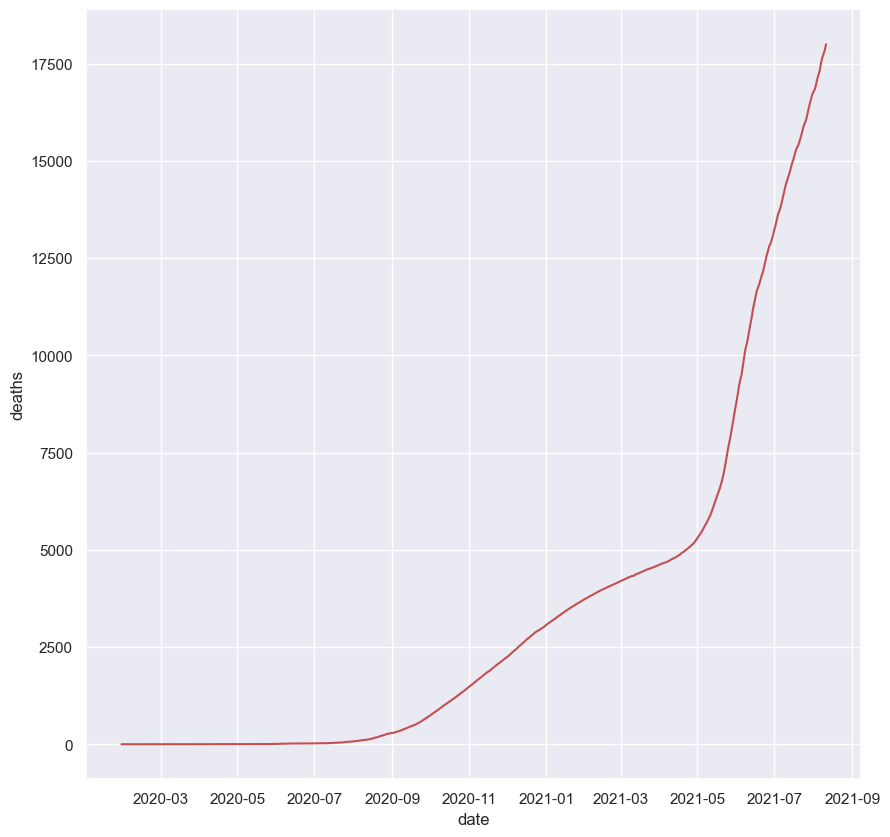

In [46]:
sns.set({'figure.figsize':(10,10)})
sns.lineplot(x='date',y='deaths',data=kerala,color='r')
plt.show()

In [47]:
# linear regression

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
Maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


In [50]:
# converting datetime into ordinal
Maha['date'] = Maha['date'].map(dt.datetime.toordinal)

C:\Users\hpw\AppData\Local\Temp\ipykernel_18664\3849938304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maha['date'] = Maha['date'].map(dt.datetime.toordinal)


In [51]:
# getting dependent variable and indipendent variable
x = Maha['date']
y = Maha['confirmed']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size= 0.3)

In [53]:
x_train

16618    737972
4198     737623
12226    737850
5985     737674
2649     737580
          ...  
9526     737775
8190     737737
15034    737928
14458    737912
850      737526
Name: date, Length: 364, dtype: int64

In [54]:
x_test

15898    737952
8645     737750
819      737525
13090    737874
10102    737791
          ...  
15142    737931
5075     737648
4830     737641
2086     737564
7315     737712
Name: date, Length: 156, dtype: int64

In [55]:
y_train

16618    6061404
4198      284281
12226    2155070
5985      883862
2649       74860
          ...   
9526     1886807
8190     1714273
15034    5405068
14458    4665754
850         1574
Name: confirmed, Length: 364, dtype: int64

In [56]:
y_test

15898    5876087
8645     1768695
819         1364
13090    2564881
10102    1932112
          ...   
15142    5497448
5075      524513
4830      450196
2086       35058
7315     1543837
Name: confirmed, Length: 156, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [60]:
Maha.tail()

,date,state,cured,deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [70]:
lr.predict(np.array([[738222]]))

array([[8432427.04145241]])